<a href="https://colab.research.google.com/github/pdh93621/Deep-learning/blob/NLP/kor2eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 파일 불러오기

In [88]:
import pandas as pd
import numpy as np

In [89]:
train_en = open('/content/drive/MyDrive/dataset/NLP/korean-english/korean-english-park.train/korean-english-park.train.en','r')
train_en = train_en.read()

In [90]:
train_en = train_en.split('\n')

In [91]:
print(train_en[0])

Much of personal computing is about "can you top this?"


In [92]:
train_ko = open('/content/drive/MyDrive/dataset/NLP/korean-english/korean-english-park.train/korean-english-park.train.ko', 'r')
train_ko = train_ko.read().split('\n')

In [93]:
print(train_ko[0])

개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"


In [94]:
print(f'train_en: {len(train_en)}, train_ko: {len(train_ko)}')

train_en: 94124, train_ko: 94124


In [95]:
train_en = np.array(train_en)
train_ko = np.array(train_ko)

In [96]:
df = pd.DataFrame({
    'ko': train_ko,
    'en': train_en
})

In [144]:
test_ko = open('/content/drive/MyDrive/dataset/NLP/korean-english/korean-english-park.test/korean-english-park.test.ko')
test_en = open('/content/drive/MyDrive/dataset/NLP/korean-english/korean-english-park.test/korean-english-park.test.en')
test_ko = test_ko.read().split('\n')
test_en = test_en.read().split('\n')
print(f'test_en: {len(test_en)}')
print(f'test_ko: {len(test_ko)}')


test_en: 2001
test_ko: 2001


In [146]:
for i in range(5):
  print(f'{test_ko[i]} -> {test_en[i]}')

토론에 참여한 사람들은 법 집행과 국가 안전보장에 대한 우려를 표명해야 할 필요성을 진지하게 받아 들이고 있습니다. -> Those involved in the discussions do take seriously the need to address concerns of law enforcement and national security.
또한 새로운 기술 개발이 어떤 해결책을 제공해 주는데 도움이 될 것이고, 동시 에 통신망 사용자들이 보다 안전하게 통신을 할 수 있도록 도움을 주게 되리라는 희망도 있습니다. -> There is also some hope that new technology developments will help to provide some solutions and at the same time helping to make users of the networks more secure in their communications.
그래서 클리퍼 칩에 대한 개인적인 해결책은 서서히 자취를 감출 것입니다. 그러나 이 문제는 계속 우리 곁에 존재할 것이며, 당분간은 심각한 상태로 존재할 것입니다. -> So the individual solution of the clipper chip may fade from sight, but the questions will be with us and will remain serious for some time.
이탈리아의 천문학자들이 멀리에 있는 별들의 궤도를 도는 행성의 대기에서 생명체의 필수 요소인 물이 존재한다는 징후를 발견했다. -> Italian astronomers have found signs of water, a necessary ingredient for life, in the atmosphere of planets orbiting distant stars.
물이 있다는 것이 다른 행성에 생명체들이 가득하다는 것을 의미하지는 않지만, 이번 발견이 확인된다면 그런 일이 가능할 수 있다는 추측을 

### 중복 제거
target(en)을 기준으로 제거

In [60]:
print(len(df['ko']), len(df['ko'].drop_duplicates()))

94124 77408


In [61]:
print(len(df['en']), len(df['en'].drop_duplicates()))

94124 75599


In [62]:
print(len(df), len(df.drop_duplicates()))

94124 78957


In [98]:
df = df.drop_duplicates('en')
print(len(df))

75599


### 한국어 토큰화
앞 4줄은 Mecab불러오기

In [9]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [10]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [11]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 152kB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
     |████████████████████████████████| 450kB 51.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-24 00:20:35--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=4WuR9C3hsBXeDwg0kuVpAUiW8vs%3D&Expires=1624495681&AWSAccessKeyId=AKIA6KOSE3BN

In [13]:
from konlpy.tag import Mecab

In [59]:
df['ko'] = df['ko'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ?!"]',' ')
print(df['ko'][:5])

0                 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
1    모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하...
2                           그러나 이것은 또한 책상도 필요로 하지 않는다 
3         달러하는 이 최첨단 무선 광마우스는 허공에서 팔목  팔  그외에 어떤 부분...
4    정보 관리들은 동남 아시아에서의 선박들에 대한 많은  테러  계획들이 실패로 돌아갔...
Name: ko, dtype: object


In [38]:
print(df['ko'][:5])

0                       개인 용 컴퓨터 사용 상당 부분 이것 보다 뛰어날 느냐
1    모든 광 마우스 와 마찬가지 로 광 마우스 도 책상 위 놓 마우스 패드 를 필요 로...
2                           그러나 이것 또한 책상 도 필요 로 지 않 는다
3    달러 최첨단 무선 광 마우스 허공 에서 팔목 팔 그 외 어떤 부분 든 그 움직임 따...
4    정보 관리 동남 아시아 에서 선박 대한 많 테러 계획 실패 로 돌아갔 음 밝혔으며 ...
Name: ko, dtype: object


In [65]:
stopwords = pd.read_table('/content/drive/MyDrive/dataset/NLP/한국어불용어100.txt', '\t', header = None)
print(stopwords[0])

0      이
1      있
2      하
3      것
4      들
      ..
95     원
96     잘
97    통하
98    소리
99     놓
Name: 0, Length: 100, dtype: object


In [49]:
tokenizer = Mecab()
stopwords = stopwords[0]

In [50]:
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #토큰화
    temp_data = tokenizer.morphs(sentence)
    #불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords]
    text_data.append(temp_data)
  text_data = list(map(' '.join, text_data))
  return text_data

df['ko'] = preprocessing(df['ko'])

### 영어 토큰화

In [54]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
for s in range(len(df['en'])):
  df['en'][s] = word_tokenize(df['en'][s])

print(df['en'][:5])  

0    [Much, of, personal, computing, is, about, ``,...
1    [so, a, mention, a, few, weeks, ago, about, a,...
2    [Like, all, optical, mice, ,, But, it, also, d...
3    [uses, gyroscopic, sensors, to, control, the, ...
4    [Intelligence, officials, have, revealed, a, s...
Name: en, dtype: object


In [56]:
print(df['en'][0])

['Much', 'of', 'personal', 'computing', 'is', 'about', '``', 'can', 'you', 'top', 'this', '?', "''"]


### 필요 패키지

In [84]:
import tensorflow as tf
import numpy as np

from konlpy.tag import Mecab
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

In [86]:
!sudo apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 161068 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [87]:
import matplotlib as mpl

%config InlineBackend.figure_format = 'retina'

import matplotlib.font_manager as fm
fontpath ='/usr/share'

### 데이터 전처리

In [99]:
cleaned_eng_corpus = {}
cleaned_kor_corpus = {}
mecab = Mecab()

In [112]:
cleaned_corpus = pd.DataFrame({
    'kor': df['ko'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', ' '),
    'eng': df['en'].str.replace('[^a-z A-Z]', ' ')
})
cleaned_corpus = cleaned_corpus.reset_index()

In [113]:
for i in range(len(cleaned_corpus)):
  cleaned_corpus['kor'][i] = mecab.morphs(cleaned_corpus['kor'][i])
  cleaned_corpus['eng'][i] = cleaned_corpus['eng'][i].split()
 
print(cleaned_corpus['kor'][:5])
print(cleaned_corpus['eng'][:5])  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    [개인, 용, 컴퓨터, 사용, 의, 상당, 부분, 은, 이것, 보다, 뛰어날, 수,...
1    [모든, 광, 마우스, 와, 마찬가지, 로, 이, 광, 마우스, 도, 책상, 위, ...
2          [그러나, 이것, 은, 또한, 책상, 도, 필요, 로, 하, 지, 않, 는다]
3    [달러, 하, 는, 이, 최첨단, 무선, 광, 마우스, 는, 허공, 에서, 팔목, ...
4    [정보, 관리, 들, 은, 동남, 아시아, 에서, 의, 선박, 들, 에, 대한, 많...
Name: kor, dtype: object
0    [Much, of, personal, computing, is, about, can...
1    [so, a, mention, a, few, weeks, ago, about, a,...
2    [Like, all, optical, mice, But, it, also, does...
3    [uses, gyroscopic, sensors, to, control, the, ...
4    [Intelligence, officials, have, revealed, a, s...
Name: eng, dtype: object


In [114]:
remove_list = []
for i in range(len(cleaned_corpus)):
  if len(cleaned_corpus['eng'][i]) <= 48:
    cleaned_corpus['eng'][i] = ['<start>'] + cleaned_corpus['eng'][i] + ['<end>']
  else:
    remove_list.append(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [115]:
print(remove_list[:5])

[124, 332, 414, 426, 429]


In [116]:
cleaned_corpus = cleaned_corpus.drop(remove_list)

In [117]:
print(len(cleaned_corpus))

74667


In [118]:
maxlen = 50
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', num_words=20000)
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post', maxlen = maxlen)

    return tensor, tokenizer

In [120]:
enc_tensor, enc_vocab = tokenize(cleaned_corpus['kor'])
dec_tensor, dec_vocab = tokenize(cleaned_corpus['eng'])

print("Korean vocab size: ", len(enc_vocab.index_word))
print("English vocab size :", len(dec_vocab.index_word))

Korean vocab size:  41713
English vocab size : 44118


In [125]:
print(len(enc_tensor[12400]), len(dec_tensor[12400]))

50 50


### 모델링

In [126]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.w_dec = tf.keras.layers.Dense(units)
    self.w_enc = tf.keras.layers.Dense(units)
    self.w_com = tf.keras.layers.Dense(1)

  def call(self, h_enc, h_dec):
    # h_enc shape : [batch x length x units]
    # h_enc shape : [batch x units]

    h_enc = self.w_enc(h_enc)
    h_dec = tf.expand_dims(h_dec, 1)
    h_dec = self.w_dec(h_dec)

    score = self.w_com(tf.nn.tanh(h_dec+h_enc))

    attn = tf.nn.softmax(score, axis=1)

    context_vec = attn * h_enc
    context_vec = tf.reduce_sum(context_vec, axis=1)

    return context_vec, attn

In [127]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units):
    super(Encoder, self).__init__()

    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(enc_units, return_sequences=True)

  def call(self, x):
    out = self.embedding(x)
    out = self.gru(out)

    return out

In [128]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units):
    super(Decoder, self).__init__()
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(dec_units,
                                   return_sequences=True,
                                   return_state = True)
    self.fc = tf.keras.layers.Dense(vocab_size)
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, h_dec, enc_out):
    context_vec, attn = self.attention(enc_out, h_dec)

    out = self.embedding(x)
    out = tf.concat([tf.expand_dims(context_vec, 1), out], axis = -1)

    out, h_dec = self.gru(out)
    out = tf.reshape(out, (-1, out.shape[2]))
    out = self.fc(out)

    return out, h_dec, attn

In [129]:
batch_size = 48
src_vocab_size = len(enc_vocab.index_word)+1
tgt_vocab_size = len(dec_vocab.index_word)+1

units = 128
embedding_dim = 128

encoder = Encoder(src_vocab_size, embedding_dim, units)
decoder = Decoder(tgt_vocab_size, embedding_dim, units)

sequence_len = 50

sample_enc = tf.random.uniform((batch_size, sequence_len))
sample_output = encoder(sample_enc)

print('Encoder Output :', sample_output.shape)

sample_state = tf.random.uniform((batch_size, units))
sample_logits, h_dec, attn = decoder(tf.random.uniform((batch_size, 1)),
                                     sample_state, sample_output)

print('Decoder Output:', sample_logits.shape)
print('Decoder Hidden state:', h_dec.shape)
print('Attention:', attn.shape)

Encoder Output : (48, 50, 128)
Decoder Output: (48, 44119)
Decoder Hidden state: (48, 128)
Attention: (48, 50, 1)


In [139]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real,0))
  loss = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  return tf.reduce_mean(loss)

In [140]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
  bsz = src.shape[0]
  loss = 0

  with tf.GradientTape() as tape:
    enc_out = encoder(src)
    h_dec = enc_out[:, -1]

    dec_src = tf.expand_dims([dec_tok.word_index['<start>']]*bsz ,1)

    for t in range(1, tgt.shape[1]):
      pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

      loss += loss_function(tgt[:, t], pred)
      dec_src = tf.expand_dims(tgt[:, t], 1)

  batch_loss = (loss/int(tgt.shape[1]))
  variables = encoder.trainable_variables + decoder.trainable_variables
  gradients = tape.gradient(loss, variables)
  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss



In [141]:
!pip install tqdm

In [142]:
from tqdm.notebook import tqdm
import random

epochs = 15

for epoch in range(epochs):
  total_loss = 0
  idx_list = list(range(0, enc_tensor.shape[0], batch_size))
  random.shuffle(idx_list)
  t = tqdm(idx_list)

  for (batch, idx) in enumerate(t):
    batch_loss = train_step(enc_tensor[idx:idx+batch_size],
                            dec_tensor[idx:idx+batch_size],
                            encoder,
                            decoder,
                            optimizer,
                            dec_vocab)
    total_loss += batch_loss

    t.set_description_str('Epoch %2d' % (epoch + 1))
    t.set_postfix_str('Loss %.4f'% (total_loss.numpy() / (batch+1)))

### 평가

decoder에 들어가는 데이터를 시작과 끝을 안나눠서 넣었더니 결과가 처참하다

In [148]:
test_ko = pd.DataFrame({'ko':test_ko})

In [149]:
test_ko['ko'] = test_ko['ko'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', ' ')

In [155]:
def preprocess_sentence(sentence):
  sentence.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', ' ')
  result = mecab.morphs(sentence)
  return result

In [150]:
def evaluate(sentence, encoder, decoder):
  attention = np.zeros((dec_tensor.shape[-1], enc_tensor.shape[-1]))

  sentence = preprocess_sentence(sentence)
  inputs = enc_vocab.texts_to_sequences([sentence])
  inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                         maxlen=enc_tensor.shape[-1],
                                                         padding='post')
  result = ''
  enc_out = encoder(inputs)

  dec_hidden = enc_out[:, -1]
  dec_input = tf.expand_dims([dec_vocab.word_index['<start>']],0)

  for t in range(dec_tensor.shape[-1]):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention[t] = attention_weights.numpy()

    predicted_id = \
    tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

    result += dec_vocab.index_word[predicted_id] + ' '

    if dec_vocab.index_word[predicted_id] == '<end>':
      return result, sentence, attention_weights
    
    dec_input = tf.expand_dims([predicted_id], 0)
  return result, sentence, attention

In [162]:
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1,1,1)
  ax.matshow(attention, cmap = 'viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation = 90)
  ax.set_yticklabels(['']+ predicted_sentence, fontdict = fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
  plt.show()

In [160]:
def translate(sentence, encoder, decoder):
  result, sentence, attention = evaluate(sentence, encoder, decoder)

  print('Input: %s '% (sentence))
  print('Predicted translation: {}'.format(result))

  attention = attention[:len(result), :len(sentence)]
  plot_attention(attention, sentence, result.split(' '))

Input: ['일곱', '명', '의', '사망자', '가', '발생', '했', '다', '.'] 
Predicted translation: the death toll from the death toll from the death toll from the death toll from the death toll from the death toll from the death toll from the death toll from the death toll from the death toll from the death toll from the death toll from the death 


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44273 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_

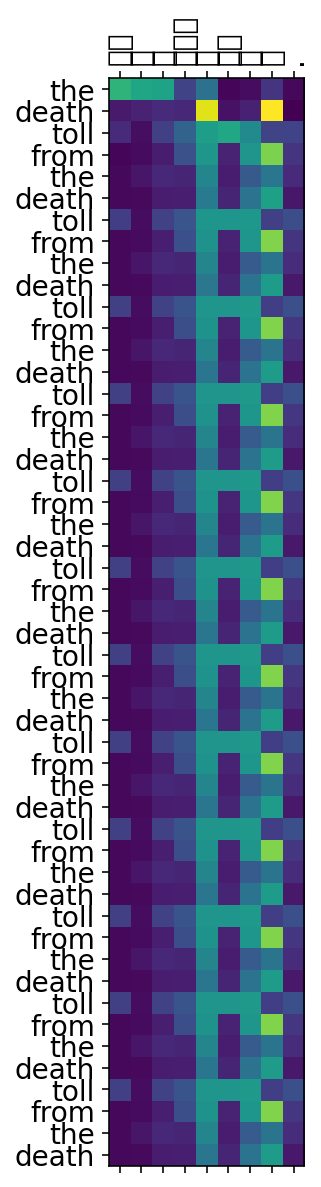

In [163]:
translate('일곱 명의 사망자가 발생했다.',encoder, decoder)